In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from random import uniform
from config import api_key
from config import url 


In [2]:
cities = []

the_unique_cities = []
cities_name = []
countries_code = [] 

# Some random coordinates (2500 cities - duplicates might be generated)
for x in range(2500):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities.append(city)

#get 500 unique cities # in case cities were not found in the API I'm generating 700 values 
unique_cities = list(set(cities))
for x in range(700):
    the_unique_cities.append(unique_cities[x])
    cities_name.append(unique_cities[x].city_name)
    countries_code.append(unique_cities[x].country_code)
    
# unique_cities_hh = list(set(the_unique_cities))
# print(len(unique_cities_hh))

In [3]:
#insert the lists above in a new df
cities_df = pd.DataFrame({'City': cities_name,
                         'countries': countries_code})
cities_df.head()

,City,countries
0,maniitsoq,gl
1,nanortalik,gl
2,picota,pe
3,tommot,ru
4,praia da vitoria,pt


In [4]:
# Loop through the list of cities_df and add the data to a new df.
column_names = ["City", "Country","Temp","Lat","Lon","Humidity","Clouds", "Wind Speed"]
all_data_df = pd.DataFrame(columns=column_names)

row_count = 1

print("Start Import")
for index, row in cities_df.iterrows():
    requested_city = row["City"]
    requested_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + requested_city.replace(" ","+")
    response = requests.get(requested_url).json()
    
    if response["cod"] == "404":
        print("Data not found, check next record.")

    else:
        all_data_df.at[index, "City"] = response["name"]
        all_data_df.at[index, "Country"] = response["sys"]["country"]
        all_data_df.at[index, "Temp"] = response["main"]["temp"]
        all_data_df.at[index, "Lat"] = response["coord"]["lat"]
        all_data_df.at[index, "Lon"] = response["coord"]["lon"]
        all_data_df.at[index, "Humidity"] = response["main"]["humidity"]
        all_data_df.at[index, "Clouds"] = response["clouds"]["all"]
        all_data_df.at[index, "Wind Speed"] = response["wind"]["speed"]       
        
        print("#####################################")
        print("Proceesing Record # " , row_count, ' | ' , response["name"])
        print(requested_url)
        row_count += 1



Start Import
#####################################
Proceesing Record #  1  |  Maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=maniitsoq
#####################################
Proceesing Record #  2  |  Nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=nanortalik
#####################################
Proceesing Record #  3  |  Picota
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=picota
#####################################
Proceesing Record #  4  |  Tommot
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=tommot
#####################################
Proceesing Record #  5  |  Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=praia+da+vitoria
#####################################
Proce

#####################################
Proceesing Record #  44  |  Gamboma
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=gamboma
#####################################
Proceesing Record #  45  |  Hailar
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=hailar
Data not found, check next record.
#####################################
Proceesing Record #  46  |  Tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=tasiilaq
#####################################
Proceesing Record #  47  |  Bougouni
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=bougouni
#####################################
Proceesing Record #  48  |  Canmore
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=canmore
#####################################


#####################################
Proceesing Record #  87  |  Kerchevskiy
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=kerchevskiy
#####################################
Proceesing Record #  88  |  Jizan
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=jizan
#####################################
Proceesing Record #  89  |  Inyonga
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=inyonga
#####################################
Proceesing Record #  90  |  Kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=kudahuvadhoo
#####################################
Proceesing Record #  91  |  Semey
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=semey
#####################################
Proceesing Record #  92  | 

#####################################
Proceesing Record #  131  |  Verkh-Usugli
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=verkh-usugli
#####################################
Proceesing Record #  132  |  Fare
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=fare
#####################################
Proceesing Record #  133  |  Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=saint-augustin
#####################################
Proceesing Record #  134  |  Hofn
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=hofn
#####################################
Proceesing Record #  135  |  Yenotayevka
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=yenotayevka
#####################################
Proceesing R

#####################################
Proceesing Record #  173  |  San Cristobal
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=san+cristobal
#####################################
Proceesing Record #  174  |  Romny
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=romny
#####################################
Proceesing Record #  175  |  Cayenne
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=cayenne
#####################################
Proceesing Record #  176  |  Skjervoy
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=skjervoy
#####################################
Proceesing Record #  177  |  Danilov
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=danilov
#####################################
Proceesing Record #  1

#####################################
Proceesing Record #  215  |  Mukdahan
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=mukdahan
#####################################
Proceesing Record #  216  |  The Valley
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=the+valley
#####################################
Proceesing Record #  217  |  Mopti
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=mopti
#####################################
Proceesing Record #  218  |  San Ciro de Acosta
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=san+ciro+de+acosta
Data not found, check next record.
Data not found, check next record.
#####################################
Proceesing Record #  219  |  Svetlaya
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04

#####################################
Proceesing Record #  258  |  Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=bambous+virieux
#####################################
Proceesing Record #  259  |  Sobolevo
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=sobolevo
#####################################
Proceesing Record #  260  |  Kirakira
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=kirakira
#####################################
Proceesing Record #  261  |  Mahanoro
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=mahanoro
#####################################
Proceesing Record #  262  |  Turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=turukhansk
#####################################
Proc

#####################################
Proceesing Record #  301  |  Pilas
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=pilas
Data not found, check next record.
#####################################
Proceesing Record #  302  |  Port Hawkesbury
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=port+hawkesbury
#####################################
Proceesing Record #  303  |  Hay River
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=hay+river
#####################################
Proceesing Record #  304  |  Mitsamiouli
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=mitsamiouli
#####################################
Proceesing Record #  305  |  Mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=mnogovershi

#####################################
Proceesing Record #  344  |  Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=ponta+do+sol
#####################################
Proceesing Record #  345  |  Mananjary
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=mananjary
#####################################
Proceesing Record #  346  |  Abu Kamal
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=abu+kamal
Data not found, check next record.
#####################################
Proceesing Record #  347  |  Guaruja
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=guaruja
#####################################
Proceesing Record #  348  |  Ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=ornskoldsvik
#######

#####################################
Proceesing Record #  388  |  Darab
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=darab
#####################################
Proceesing Record #  389  |  Marystown
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=marystown
#####################################
Proceesing Record #  390  |  Ridge
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=ridge
#####################################
Proceesing Record #  391  |  Ust-Barguzin
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=ust-barguzin
#####################################
Proceesing Record #  392  |  Dobarlau
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=dobarlau
#####################################
Proceesing Record #  393

#####################################
Proceesing Record #  431  |  Esperance
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=esperance
#####################################
Proceesing Record #  432  |  Vysokovsk
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=vysokovsk
#####################################
Proceesing Record #  433  |  Plainview
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=plainview
#####################################
Proceesing Record #  434  |  Itaituba
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=itaituba
#####################################
Proceesing Record #  435  |  Sayat
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=sayat
Data not found, check next record.
#########################

#####################################
Proceesing Record #  474  |  Caravelas
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=caravelas
#####################################
Proceesing Record #  475  |  Pakxan
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=pakxan
Data not found, check next record.
Data not found, check next record.
#####################################
Proceesing Record #  476  |  Akita
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=akita
#####################################
Proceesing Record #  477  |  Ust-Kuyga
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=ust-kuyga
#####################################
Proceesing Record #  478  |  Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=k

#####################################
Proceesing Record #  517  |  Garango
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=garango
#####################################
Proceesing Record #  518  |  Anadyr
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=anadyr
#####################################
Proceesing Record #  519  |  Hammerfest
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=hammerfest
#####################################
Proceesing Record #  520  |  Hobart
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=hobart
#####################################
Proceesing Record #  521  |  Yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=yeppoon
#####################################
Proceesing Record #  522  |  A

#####################################
Proceesing Record #  560  |  Hwange
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=hwange
#####################################
Proceesing Record #  561  |  Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=hermanus
#####################################
Proceesing Record #  562  |  Winslow
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=winslow
#####################################
Proceesing Record #  563  |  Chinchani
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=chinchani
#####################################
Proceesing Record #  564  |  Bhum
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=bhum
#####################################
Proceesing Record #  565  |  Bluff

#####################################
Proceesing Record #  603  |  Mudbidri
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=mudbidri
#####################################
Proceesing Record #  604  |  Sibu
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=sibu
#####################################
Proceesing Record #  605  |  Belyy Yar
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=belyy+yar
#####################################
Proceesing Record #  606  |  Salalah
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=salalah
#####################################
Proceesing Record #  607  |  Cerknica
http://api.openweathermap.org/data/2.5/weather?appid=0fe4c0e404fd387874321d6ca509c04a&units=IMPERIAL&q=cerknica
#####################################
Proceesing Record #  608  |  H

In [5]:
all_data_df.count()

City          622
Country       622
Temp          622
Lat           622
Lon           622
Humidity      622
Clouds        622
Wind Speed    622
dtype: int64

In [6]:
all_data_df.set_index(['City'])
all_data_df.count()

City          622
Country       622
Temp          622
Lat           622
Lon           622
Humidity      622
Clouds        622
Wind Speed    622
dtype: int64

In [8]:
# Save data to a CSV file
all_data_df.to_csv("Resources/all_data.csv")

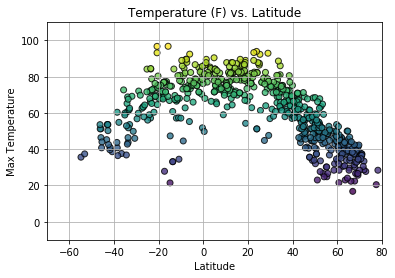

In [9]:
#Temperature (F) vs. Latitude

plt.scatter(all_data_df["Lat"], 
            all_data_df["Temp"], c=all_data_df["Temp"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City")

plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 80])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("Resources/Temperature_Latitude.png")

# Show plot
plt.show()

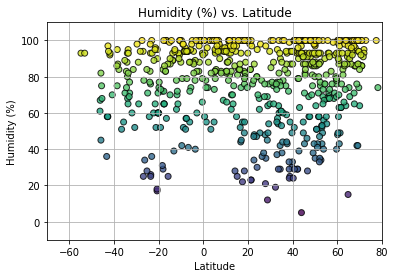

In [10]:
#Humidity (%) vs. Latitude
plt.scatter(all_data_df["Lat"], 
            all_data_df["Humidity"], c=all_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City")

plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 80])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("Resources/Humidity_Latitude.png")

# Show plot
plt.show()

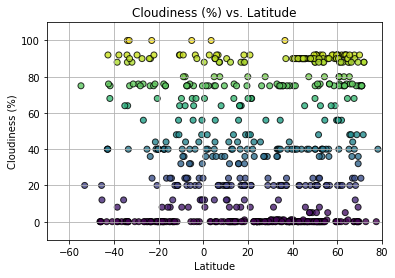

In [11]:
#Cloudiness (%) vs. Latitude
plt.scatter(all_data_df["Lat"], 
            all_data_df["Clouds"], c=all_data_df["Clouds"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City")

plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 80])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("Resources/Cloudiness_Latitude.png")

# Show plot
plt.show()

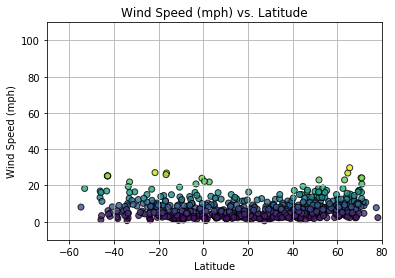

In [12]:
#Wind Speed (mph) vs. Latitude

plt.scatter(all_data_df["Lat"], 
            all_data_df["Wind Speed"], c=all_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="City")

plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 80])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("Resources/WindSpeed_Latitude.png")

# Show plot
plt.show()